In [1]:
#import files
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import DataFrame
from collections import Counter


%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#read from csv file 
df = pd.read_csv('ecoli1.csv')

# 336 examples; 7 features ; binary class
# show all data, examples and labels
df.head()

,v1,v2,v3,v4,v5,v6,v7,class
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,0
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,0
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,0
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,0
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,0


In [3]:
X = df.values[:, 0:7]
y = df.values[:, 7]

In [4]:
len(df)

336

In [5]:
print(sorted(Counter(y).items()))

[(0.0, 259), (1.0, 77)]


In [6]:
X

array([[ 0.49,  0.29,  0.48, ...,  0.56,  0.24,  0.35],
       [ 0.07,  0.4 ,  0.48, ...,  0.54,  0.35,  0.44],
       [ 0.56,  0.4 ,  0.48, ...,  0.49,  0.37,  0.46],
       ..., 
       [ 0.61,  0.6 ,  0.48, ...,  0.44,  0.39,  0.38],
       [ 0.59,  0.61,  0.48, ...,  0.42,  0.42,  0.37],
       [ 0.74,  0.74,  0.48, ...,  0.31,  0.53,  0.52]])

In [7]:
y

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

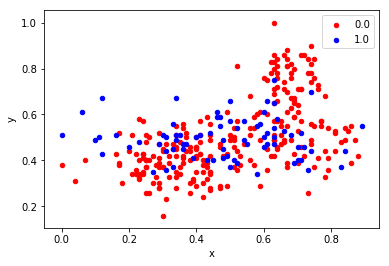

In [8]:
#visualize the data before any work is done
dt = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = dt.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [19]:
# SMOTEENN
from imblearn.combine import SMOTEENN
sm = SMOTEENN(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [20]:
# number of examples after applying the algorithm
len(X_res)

448

In [21]:
# of examples for each class
print(sorted(Counter(y_res).items()))

[(0.0, 219), (1.0, 229)]


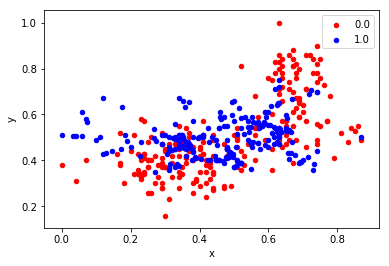

In [13]:
#visualize the data after algorithm is complete
dt = DataFrame(dict(x=X_res[:,0], y=X_res[:,1], label=y_res))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = dt.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [22]:
# SMOTEENN
from imblearn.combine import SMOTEENN
sm = SMOTEENN(sampling_strategy=0.5, random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [23]:
len(X_res)

317

In [24]:
# of examples for each class
print(sorted(Counter(y_res).items()))

[(0.0, 221), (1.0, 96)]


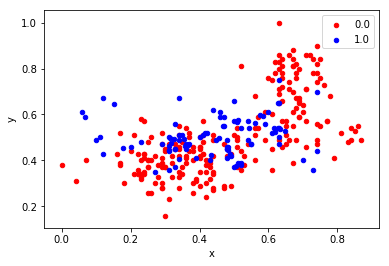

In [25]:
#visualize the data after algorithm is complete
dt = DataFrame(dict(x=X_res[:,0], y=X_res[:,1], label=y_res))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = dt.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()